<a href="https://colab.research.google.com/github/Manisha1896/python/blob/main/K_NN_WD_8AM_9Aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Classified Data',index_col=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [ ]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
df.corr()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
WTT,1.000000,-0.235255,-0.301018,-0.101517,-0.083401,-0.183628,-0.148100,-0.330977,0.324981,-0.073889,0.551394
PTI,-0.235255,1.000000,0.271908,0.001580,0.097322,0.173701,0.095060,0.246387,-0.266242,0.035834,-0.468748
EQW,-0.301018,0.271908,1.000000,-0.040291,0.144539,0.182021,0.059533,0.323857,-0.324656,0.126143,-0.598120
SBI,-0.101517,0.001580,-0.040291,1.000000,-0.007983,0.022026,-0.007666,0.037767,0.078032,0.145045,0.028874
LQE,-0.083401,0.097322,0.144539,-0.007983,1.000000,0.049944,0.035750,0.083734,-0.143929,0.044496,-0.205043
QWG,-0.183628,0.173701,0.182021,0.022026,0.049944,1.000000,0.098062,0.199189,-0.181809,0.036078,-0.327664
FDJ,-0.148100,0.095060,0.059533,-0.007666,0.035750,0.098062,1.000000,0.122888,-0.116969,-0.012923,-0.214885
PJF,-0.330977,0.246387,0.323857,0.037767,0.083734,0.199189,0.122888,1.000000,-0.363736,0.028012,-0.571483
HQE,0.324981,-0.266242,-0.324656,0.078032,-0.143929,-0.181809,-0.116969,-0.363736,1.000000,-0.129283,0.643989
NXJ,-0.073889,0.035834,0.126143,0.145045,0.044496,0.036078,-0.012923,0.028012,-0.129283,1.000000,-0.111730


In [ ]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


K Nearest Neighbors:
1. KNN is one of the very simple algorithms in ML based on Supervised Learning technique.
2. KNN model works on the assummption of similarity between the new data points and the available data points and it will put the new data point in the category which is most similar to the existing available categories.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x = df.drop('TARGET CLASS',axis=1)
y = df['TARGET CLASS']

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(x)

StandardScaler()

In [ ]:
scaled_featured = scaler.transform(x)

In [ ]:
scaled_featured

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [ ]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [ ]:
df.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [ ]:
df_feat = pd.DataFrame(scaled_featured,columns=df.columns[:-1])

In [ ]:
df_feat

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [ ]:
#09/08
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_feat,y,test_size=0.30,random_state=80)

In [ ]:
x_train.shape

(700, 10)

In [ ]:
x_test.shape

(300, 10)

In [ ]:
#Model implementation
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
#Model Evaluation
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)*100

95.33333333333334

random_state = 4
train:1,6,11,16,2,7,12,17,3,8,13,18,4,9,14,19
test: 5,10,15,20
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20

In [ ]:
#How to find the ideal value of n_neighbor
error_rate = []
for i in range(1,41):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred = knn.predict(x_test)
  error_rate.append(np.mean(pred!=y_test))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Error rate')

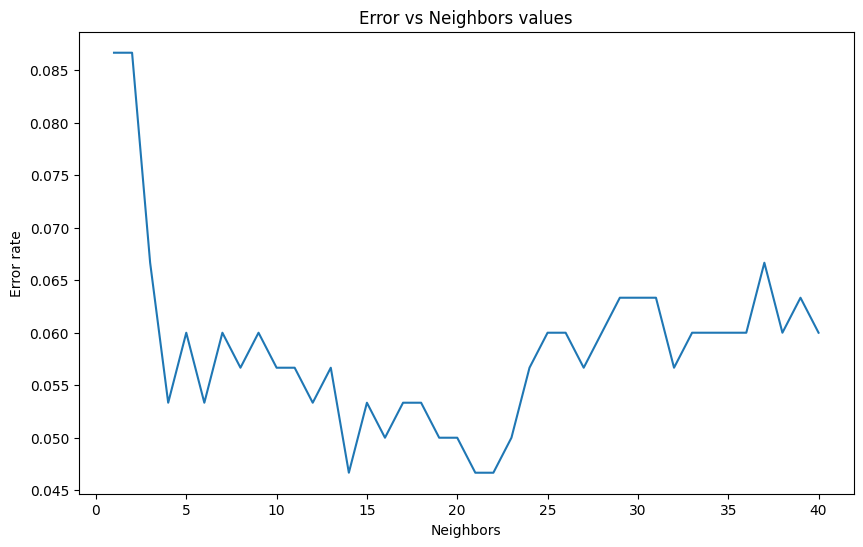

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,41),error_rate)
plt.title("Error vs Neighbors values")
plt.xlabel("Neighbors")
plt.ylabel("Error rate")